# 1. Importing Libraries and Data

In [163]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from IPython.display import display
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO 
from subprocess import call

import warnings
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2

from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from deslib.static.stacked import StackedClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import StackingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from pickle import dump

from Classes import Classification
from Classes import Ensemble

pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [164]:
df = pd.read_csv('data_cleaned6.csv')

In [165]:
df.drop(columns=['fight_time_x','fight_time_y'], inplace=True)

In [166]:
df.fx_win.value_counts(normalize=True)

1    0.500762
0    0.499238
Name: fx_win, dtype: float64

In [167]:
df.head()

,name_x,height_x,weight_x,reach_x,fx_win,age_x,str_landed_per_min_x,str_acc_x,str_absorb_per_min_x,str_def_x,td_avg_x,td_acc_x,td_def_x,sub_avg_x,win_percentage_x,name_y,height_y,weight_y,reach_y,age_y,str_landed_per_min_y,str_acc_y,str_absorb_per_min_y,str_def_y,td_avg_y,td_acc_y,td_def_y,sub_avg_y,win_percentage_y,stance_x_Open Stance,stance_x_Orthodox,stance_x_Sideways,stance_x_Southpaw,stance_x_Switch,stance_y_Open Stance,stance_y_Orthodox,stance_y_Sideways,stance_y_Southpaw,stance_y_Switch
0,Aaron Phillips,1.75,135.0,1.78,0,25.05,7.27,0.80,6.33,0.74,0.00,0.00,0.62,1.00,0.89,Matt Hobar,1.78,135.0,1.78,27.63,2.52,0.26,9.71,0.59,0.00,0.0,1.0,0.00,0.80,0,0,0,1,0,0,0,0,1,0
1,Aaron Riley,1.73,155.0,1.75,0,25.10,6.20,0.55,5.80,0.49,0.00,0.00,0.75,1.00,0.72,Spencer Fisher,1.70,155.0,1.78,29.69,2.26,0.48,8.64,0.62,1.54,0.5,1.0,4.63,0.85,0,0,0,1,0,0,0,0,1,0
2,Aaron Riley,1.73,155.0,1.75,1,27.93,5.50,0.54,5.85,0.48,1.50,0.29,0.75,0.75,0.70,Jorge Gurgel,1.70,155.0,1.75,31.81,5.80,0.50,5.80,0.50,1.00,0.5,0.5,0.00,0.64,0,0,0,1,0,0,1,0,0,0
3,Aaron Riley,1.73,155.0,1.75,1,28.66,6.91,0.52,5.96,0.45,1.26,0.38,0.58,0.42,0.69,Shane Nelson,1.75,155.0,1.78,24.69,6.85,0.42,6.85,0.42,0.00,0.0,0.0,0.00,0.78,0,0,0,1,0,0,0,0,1,0
4,Aaron Riley,1.73,155.0,1.75,1,29.47,7.68,0.53,6.10,0.50,1.11,0.38,0.11,0.00,0.68,Joe Brammer,1.73,155.0,1.73,26.77,1.39,0.24,4.17,0.58,0.00,0.0,1.0,0.00,0.70,0,0,0,1,0,0,1,0,0,0


# 2. Data Transformations

In [168]:
y = df[['fx_win']]

In [169]:
X = df.drop(columns=['fx_win','name_x','name_y'])

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=400, random_state=50, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50, stratify=y_train)

In [171]:
x_num_cols = [col for col in X.columns if '_x' in col and 'stance' not in col]
y_num_cols = [col for col in X.columns if '_y' in col and 'stance' not in col]

In [172]:
scaler = RobustScaler()

In [173]:
X_train[x_num_cols] = scaler.fit_transform(X_train[x_num_cols])
X_train[y_num_cols] = scaler.transform(X_train[y_num_cols])

X_val[x_num_cols] = scaler.transform(X_val[x_num_cols])
X_val[y_num_cols] = scaler.transform(X_val[y_num_cols])

X_test[x_num_cols] = scaler.transform(X_test[x_num_cols])
X_test[y_num_cols] = scaler.transform(X_test[y_num_cols])

In [174]:
dump(scaler, open('scaler.pkl', 'wb'))

In [44]:
# scaler_height = StandardScaler()
# height_series = pd.DataFrame(pd.concat([X_train['height_x'], X_train['height_y']], ignore_index=True))
# scaler_height.fit_transform(height_series)
# X_train[['height_x','height_y']] = scaler_height.fit_transform(X_train[['height_x','height_y']])
# X_val[['height_x','height_y']] = scaler_height.transform(X_val[['height_x','height_y']])
# X_test[['height_x','height_y']] = scaler_height.transform(X_test[['height_x','height_y']])

In [45]:
# scaler_weight = StandardScaler()
# weight_series = pd.DataFrame(pd.concat([X_train['weight_x'], X_train['weight_y']], ignore_index=True))
# scaler_weight.fit_transform(weight_series)
# X_train[['weight_x','weight_y']] = scaler_weight.fit_transform(X_train[['weight_x','height_y']])
# X_val[['weight_x','weight_y']] = scaler_weight.transform(X_val[['weight_x','height_y']])
# X_test[['weight_x','weight_y']] = scaler_weight.transform(X_test[['weight_x','height_y']])

In [46]:
# scaler_reach = StandardScaler()
# reach_series = pd.DataFrame(pd.concat([X_train['reach_x'], X_train['reach_y']], ignore_index=True))
# scaler_reach.fit_transform(reach_series)
# X_train[['reach_x','reach_y']] = scaler_reach.fit_transform(X_train[['reach_x','reach_y']])
# X_val[['reach_x','reach_y']] = scaler_reach.transform(X_val[['reach_x','reach_y']])
# X_test[['reach_x','reach_y']] = scaler_reach.transform(X_test[['reach_x','reach_y']])

In [47]:
# scaler_age = StandardScaler()
# age_series = pd.DataFrame(pd.concat([X_train['age_x'], X_train['age_y']], ignore_index=True))
# scaler_age.fit_transform(age_series)
# X_train[['age_x','age_y']] = scaler_age.fit_transform(X_train[['age_x','age_y']])
# X_val[['age_x','age_y']] = scaler_age.transform(X_val[['age_x','age_y']])
# X_test[['age_x','age_y']] = scaler_age.transform(X_test[['age_x','age_y']])

In [48]:
# scaler_str_landed_per_min = StandardScaler()
# str_landed_per_min_series = pd.DataFrame(pd.concat([X_train['str_landed_per_min_x'], X_train['str_landed_per_min_y']], ignore_index=True))
# scaler_str_landed_per_min.fit_transform(age_series)
# X_train[['str_landed_per_min_x','str_landed_per_min_y']] = scaler.fit_transform(X_train[['str_landed_per_min_x','str_landed_per_min_y']])
# X_val[['str_landed_per_min_x','str_landed_per_min_y']] = scaler.transform(X_val[['str_landed_per_min_x','str_landed_per_min_y']])
# X_test[['str_landed_per_min_x','str_landed_per_min_y']] = scaler.transform(X_test[['str_landed_per_min_x','str_landed_per_min_y']])

# 3. Modelling

In [175]:
skf = StratifiedKFold(n_splits=5, random_state=50)

## 3.1. Logistic Regression

In [50]:
log_reg1 = Classification("Logistic Regression", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Logistic Regression,0.660295,0.653649


The best hyperparameters are:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} 



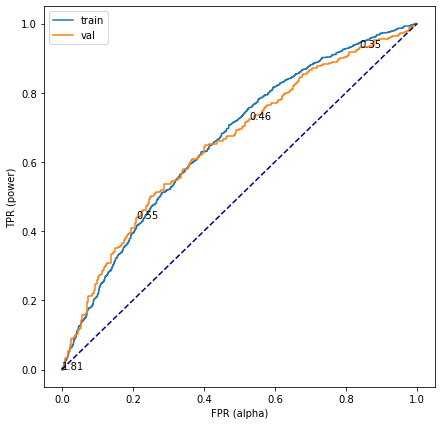

In [51]:
param_grid = {'C': [0.01,0.1,1,10,100],
             'penalty': ['l1','l2'],
             'solver': ['liblinear','saga']}
log_reg1.get_scores(param_grid, skf)

## 3.2. Support Vector Machine

In [176]:
svm1 = Classification("SVM", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,SVM,0.779638,0.694346


The best hyperparameters are:  {'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'auto'} 



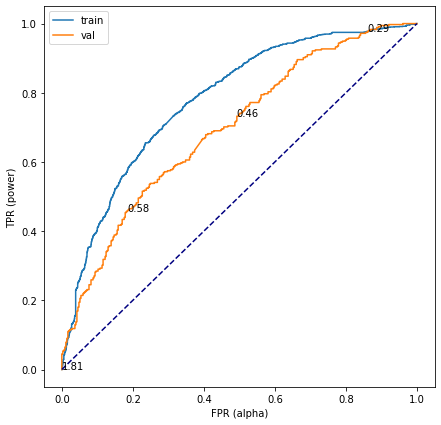

In [177]:
param_grid = {'C':[1,2,3,4,5,6],
             'degree':[1,2,3,4,5,6],
             'gamma':['scale','auto'],
             'decision_function_shape':['ovo','ovr']}
svm1.get_scores(param_grid, skf)

## 3.3. Decision Tree

In [70]:
d_tree = Classification('Decision Tree', X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Decision Tree,0.830012,0.607278


The best hyperparameters are:  {'max_depth': 10, 'min_samples_leaf': 10} 



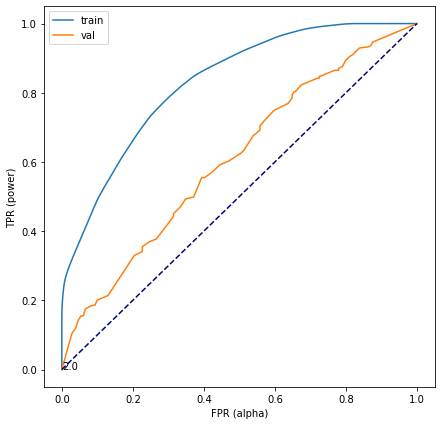

In [71]:
param_grid = {'max_depth':[1,10,100,1000],'min_samples_leaf':[1,10,100,1000]}
d_tree.get_scores(param_grid, skf)

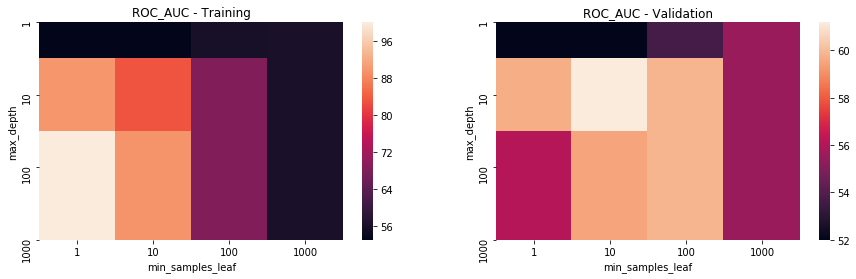

In [72]:
d_tree.opt_plots()

In [74]:
d_tree2 = Classification('Decision Tree', X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Decision Tree,0.700513,0.656486


The best hyperparameters are:  {'max_depth': 6, 'min_samples_leaf': 31} 



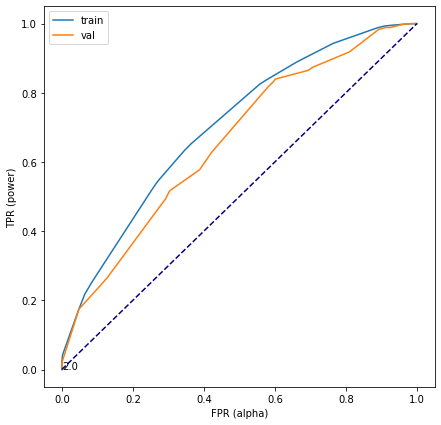

In [75]:
param_grid = {'max_depth':range(1,101,5),'min_samples_leaf':range(1,101,5)}
d_tree2.get_scores(param_grid, skf)

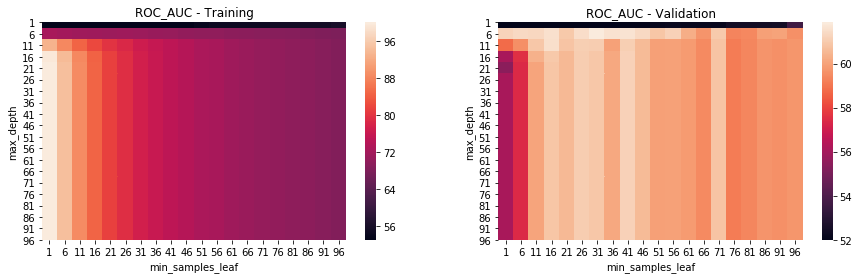

In [76]:
d_tree2.opt_plots()

In [82]:
d_tree3 = Classification('Decision Tree', X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Decision Tree,0.764849,0.621019


The best hyperparameters are:  {'max_depth': 8, 'min_samples_leaf': 18} 



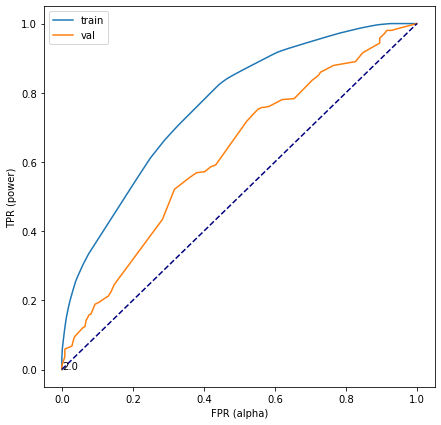

In [83]:
param_grid = {'max_depth':range(1,16,1),'min_samples_leaf':range(15,46,1)}
d_tree3.get_scores(param_grid, skf)

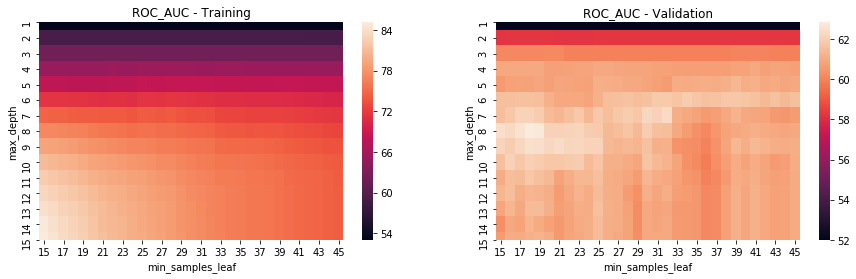

In [84]:
d_tree3.opt_plots()

## 3.4. Random Forest

In [86]:
rand_forr = Classification("Random Forest", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Random Forest,1.0,0.702534


The best hyperparameters are:  {'max_depth': 100, 'min_samples_leaf': 1} 



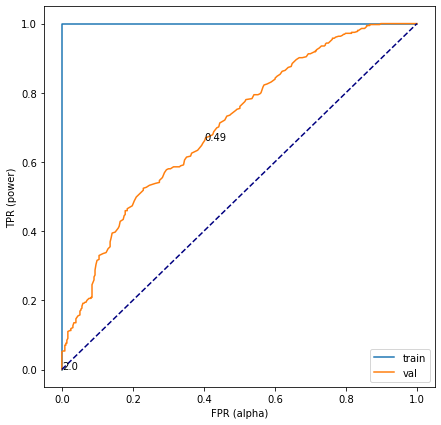

In [87]:
param_grid = {'max_depth':[1,10,100,1000],'min_samples_leaf':[1,10,100,1000]}
rand_forr.get_scores(param_grid, skf)

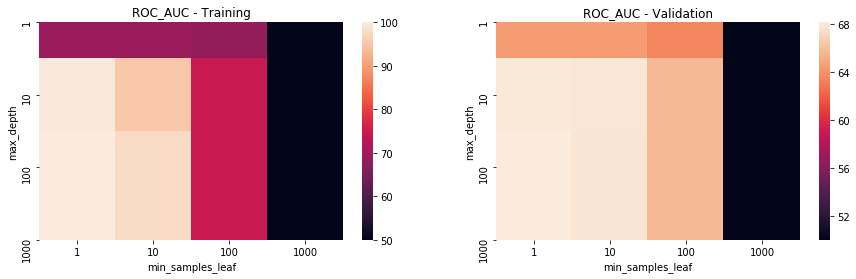

In [88]:
rand_forr.opt_plots()

In [89]:
rand_forr2 = Classification("Random Forest", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Random Forest,0.989151,0.707553


The best hyperparameters are:  {'max_depth': 50, 'min_samples_leaf': 8} 



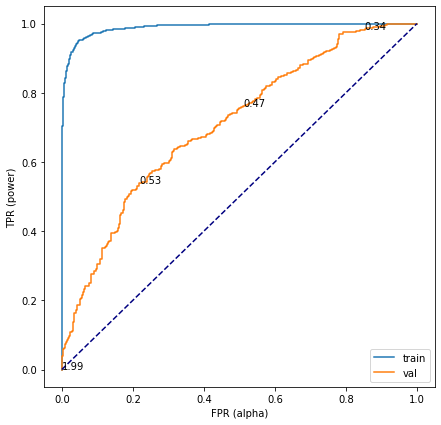

In [90]:
param_grid = {'max_depth':range(50,151,5),'min_samples_leaf':range(1,15,1)}
rand_forr2.get_scores(param_grid, skf)

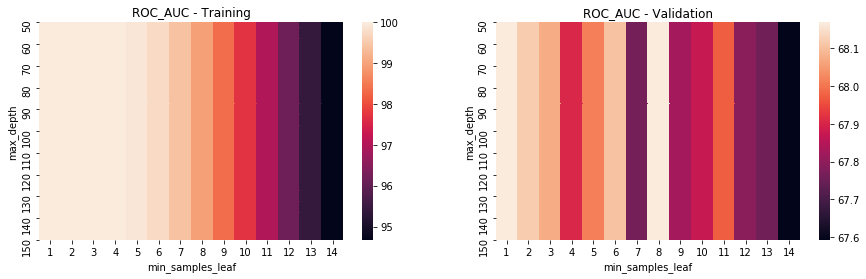

In [91]:
rand_forr2.opt_plots()

In [178]:
rand_forr3 = Classification("Random Forest", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Random Forest,0.997293,0.713458


The best hyperparameters are:  {'max_depth': 20, 'min_samples_leaf': 6} 



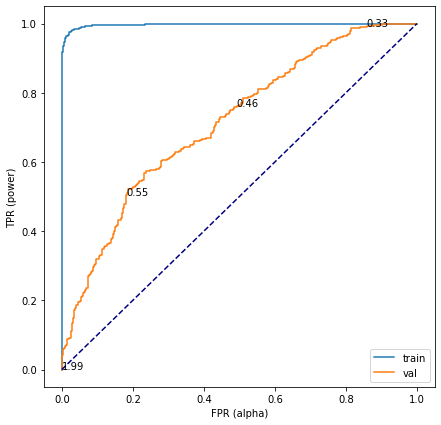

In [179]:
param_grid = {'max_depth':range(1,61,1),'min_samples_leaf':range(6,12,1)}
rand_forr3.get_scores(param_grid, skf)

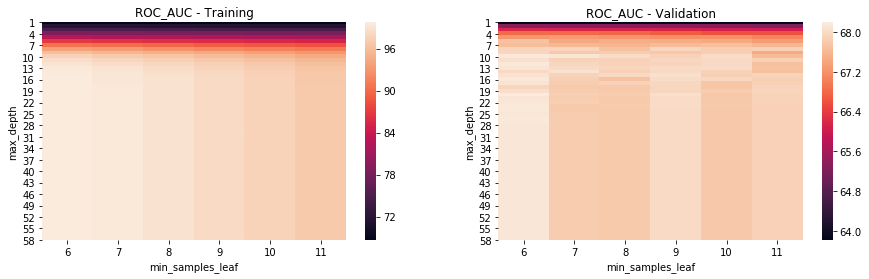

In [180]:
rand_forr3.opt_plots()

## 3.5. Voing Classifier

In [100]:
# log_reg = ('lr', log_reg1.best_model)
svm = ('svm', svm1.best_model)
# d_tree = ('d_tree', d_tree3.best_model)
rand_forr = ('rand_forr', rand_forr3.best_model)
estimators = [svm, rand_forr]
voting = Ensemble("Voting", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Voting,0.905806,0.707513


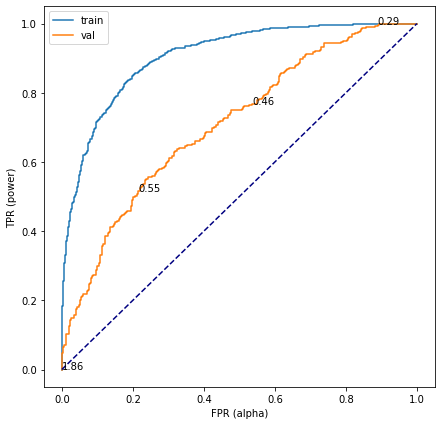

In [101]:
voting.ensemble_get_scores({}, skf)

## 3.6. Adaboost

In [104]:
estimators = svm1.best_model
adaboost2 = Ensemble("AdaBoost", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,AdaBoost,0.5,0.5


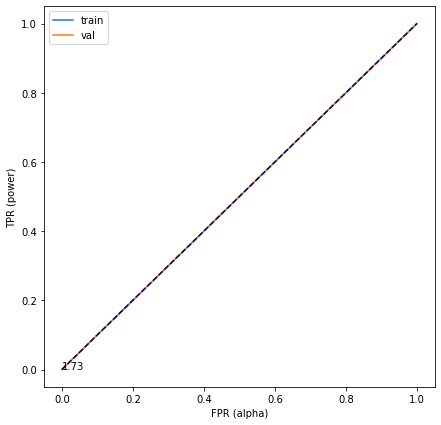

In [105]:
adaboost2.ensemble_get_scores({}, skf)

In [106]:
estimators = rand_forr3.best_model
adaboost3 = Ensemble("AdaBoost", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,AdaBoost,1.0,0.663959


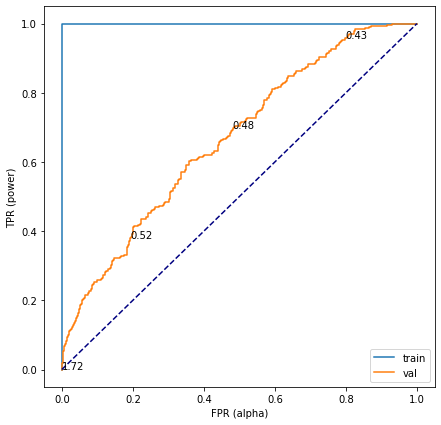

In [107]:
adaboost3.ensemble_get_scores({}, skf)

## 3.7. XGBoost

In [108]:
estimators = []
xgboost = Ensemble("XGBoost", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,XGBoost,0.842438,0.701017


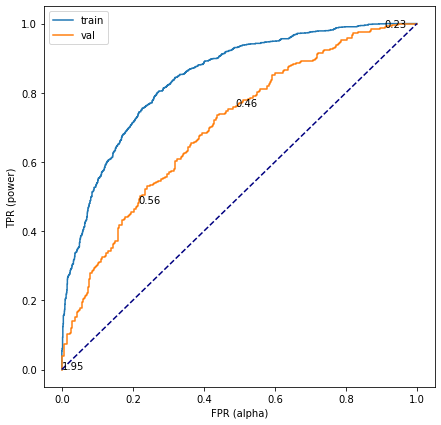

In [109]:
xgboost.ensemble_get_scores({}, skf)

## 3.8. Stacking Classifier

In [181]:
estimators = [('svm', svm1.best_model), 
              ('rnd', rand_forr3.best_model)]
stacking = Ensemble("Stacking", estimators, X_train, X_val, y_train, y_val)

In [182]:
('lr',log_reg1.best_model),

(('lr',
  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l1',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),)

,Model,Train AUC,Validation AUC
0,Stacking,0.990905,0.714855


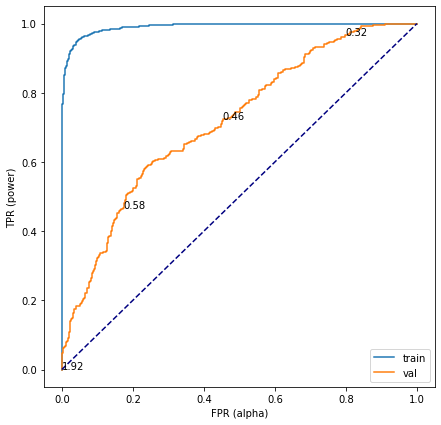

In [183]:
stacking.ensemble_get_scores({}, skf)

In [184]:
stacking.best_model.score(X_test, y_test)

0.65

## 3.9. Deep Neural Network

In [121]:
l2_reg = keras.regularizers.l2(0.0001)

In [124]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_initializer='normal', 
                 kernel_regularizer=l2_reg))
model2.add(Dropout(rate=0.1))
model2.add(Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer=l2_reg))
model2.add(Dropout(rate=0.1))
model2.add(Dense(1, activation='sigmoid'))

In [125]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                2304      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [126]:
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [130]:
history2 = model2.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_val, y_val))

Train on 2828 samples, validate on 708 samples
Epoch 1/40
2828/2828 [==============================] - 1s 508us/step - loss: 0.6811 - accuracy: 0.5654 - val_loss: 0.6552 - val_accuracy: 0.6172
Epoch 2/40
2828/2828 [==============================] - 0s 154us/step - loss: 0.6520 - accuracy: 0.6153 - val_loss: 0.6509 - val_accuracy: 0.6186
Epoch 3/40
2828/2828 [==============================] - 0s 154us/step - loss: 0.6403 - accuracy: 0.6379 - val_loss: 0.6589 - val_accuracy: 0.6045
Epoch 4/40
2828/2828 [==============================] - 0s 154us/step - loss: 0.6314 - accuracy: 0.6407 - val_loss: 0.6535 - val_accuracy: 0.6158
Epoch 5/40
2828/2828 [==============================] - 0s 153us/step - loss: 0.6266 - accuracy: 0.6566 - val_loss: 0.6563 - val_accuracy: 0.6158
Epoch 6/40
2828/2828 [==============================] - 0s 152us/step - loss: 0.6196 - accuracy: 0.6542 - val_loss: 0.6549 - val_accuracy: 0.6144
Epoch 7/40
2828/2828 [==============================] - 0s 153us/step - loss:

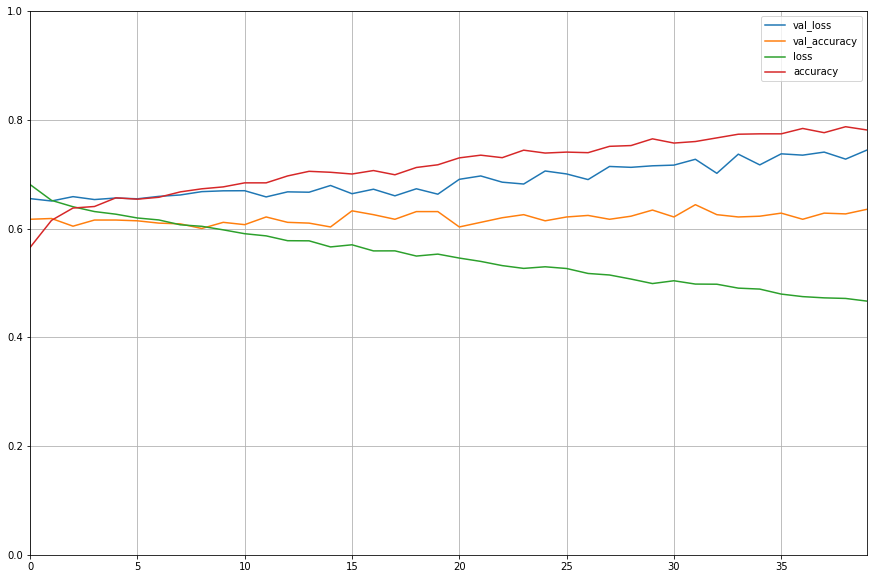

In [131]:
pd.DataFrame(history2.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [133]:
y_pred = model2.predict(X_test)

In [134]:
model2.evaluate(X_val, y_val)

708/708 [==============================] - 0s 42us/step


[0.7446452149395215, 0.6355932354927063]

In [185]:
dump(stacking.best_model, open('model.pkl', 'wb'))